## Amazon Fine Food 

Data includes:

    1.Reviews from Oct 1999 - Oct 2012
    2.568,454 reviews
    3.256,059 users
    4.74,258 products
    5.260 users with > 50 reviews

## Columns

1.Id

2.ProductId

3.UserId

4.ProfileName

5.HelpfulnessNumerator

6.HelpfulnessDenominator

7.Score

8.Time

9.Summary

10.Text


## Objective

Given review , determine if the review is positive or negative(Sentiment polarity or text classification)


# How to determine if a review is positive or negative?


 Approach = if rating is 4/5 than polarity is 1, if rating is 1/2 than polarity is 0

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3

In [2]:
df = pd.read_csv("D:\DATA\Amazon fine food\Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Reading Data with SQL

In [4]:
con = sqlite3.connect("D:\DATA\Amazon fine food\database.sqlite")

In [5]:
# giving he query where the score is not equal to 3

data = pd.read_sql_query("""SELECT * FROM Reviews WHERE Score != 3""" ,con)

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Converting data into binary classificaton task

In [7]:
#data.value_counts()
def partit(x):
    if x<3:
        return 0
    return 1

data['Score'] = data['Score'].map(partit)

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
#data.value_counts().plot.bar()
data['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

<AxesSubplot:>

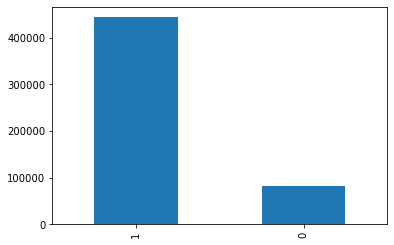

In [10]:
data['Score'].value_counts().plot.bar()

This is unstable data

In [11]:
data.drop('Id',axis=1,inplace=True)

In [12]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Droping duplicated values

In [13]:
data[data.duplicated()].shape

(256, 9)

In [14]:
data = data.sort_values("ProductId")

In [15]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [16]:
#drop the dublicate value
subset = ['UserId', 'ProfileName', 'Time', 'Text', 'Summary']
final_data = data.drop_duplicates(subset=subset)

In [17]:
final_data.shape

(365333, 9)

In [18]:
print("Retained Data is ",round((len(final_data)/len(data)) * 100,2))
print("Lost Data is ",round(100 - round((len(final_data)/len(data)) * 100,2),2))


Retained Data is  69.48
Lost Data is  30.52


# Text Preprocessing

In [19]:
print(final_data["Text"][0])
print("#"*50)
print(final_data["Text"][100])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
##################################################
I was diappointed in the flavor and texture of this mix.  I usually like most of the Low Carb things I have tried, but was diappointed in this specific one.


In [20]:
# we have to remove the HTTP... something from the text ,so we will do it by RegEx and iterating threw all the text

import re
pattern = r"http\S+" # S+ is nothing but take everthing which is after the http
regex = re.compile(pattern)

for sent in final_data["Text"].values:
    if regex.search(sent):
        print("Found the http protocol")
        text = sent
        break

Found the http protocol


###### in our Text field we found the http ,so we have to remove it

In [21]:
print(text)

I was intially introduced to Pro-Treat Beef Liver Freeze Dried Dog Treats at my veterinarian's office.  Rudy, our Jack Russell Terrior, usually not all that interested in dog treats, responded like I'd never seen before!<br /><br />I bought a couple of cans (they are pretty pricey), but gave them to him sparingly. The tricks he'd do for the Pro-Treats were really entertaining.  Now, Rudy has to take meds. for his glaucoma and thank heavens I found the large size here which is a good value, so he not only takes his medicine, but gives great tricks in return each day! He's a happy camper, despite the loss of sight in one eye.<br /><a href="http://www.amazon.com/gp/product/B0002DGRSY">Pro-Treat Beef Liver, Freeze Dried Dog Treats, 21 Ounce</a><br /><br />Rudy says, "They are the best part of my day!"  We think so too!  ~ CJ


In [22]:
pattern = r'http\S+'
cleaned_text = re.sub(r'http\S+',"",text)#re.sub is use to replace the text, we are substituing the http by ntg 

In [23]:
print(cleaned_text)

I was intially introduced to Pro-Treat Beef Liver Freeze Dried Dog Treats at my veterinarian's office.  Rudy, our Jack Russell Terrior, usually not all that interested in dog treats, responded like I'd never seen before!<br /><br />I bought a couple of cans (they are pretty pricey), but gave them to him sparingly. The tricks he'd do for the Pro-Treats were really entertaining.  Now, Rudy has to take meds. for his glaucoma and thank heavens I found the large size here which is a good value, so he not only takes his medicine, but gives great tricks in return each day! He's a happy camper, despite the loss of sight in one eye.<br /><a href=" Beef Liver, Freeze Dried Dog Treats, 21 Ounce</a><br /><br />Rudy says, "They are the best part of my day!"  We think so too!  ~ CJ


###### http is removed but href is not removed so we will use a library called beautifulsoup
#### from bs4 import BeautifulSoap

In [24]:
from bs4 import BeautifulSoup

In [25]:
soup = BeautifulSoup(text,'html')

In [26]:
soup.get_text()

'I was intially introduced to Pro-Treat Beef Liver Freeze Dried Dog Treats at my veterinarian\'s office.  Rudy, our Jack Russell Terrior, usually not all that interested in dog treats, responded like I\'d never seen before!I bought a couple of cans (they are pretty pricey), but gave them to him sparingly. The tricks he\'d do for the Pro-Treats were really entertaining.  Now, Rudy has to take meds. for his glaucoma and thank heavens I found the large size here which is a good value, so he not only takes his medicine, but gives great tricks in return each day! He\'s a happy camper, despite the loss of sight in one eye.Pro-Treat Beef Liver, Freeze Dried Dog Treats, 21 OunceRudy says, "They are the best part of my day!"  We think so too!  ~ CJ'

# Decontraction

In [27]:
#replacing the words like(I\'d,he\'d,...etc)

def decontraction(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n\'t", " not", text)  
    text = re.sub(r"\re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t'", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m'", " am", text)
    return text

In [28]:
cleaned_text = soup.get_text()

In [29]:
cleaned_text = decontraction(cleaned_text)

In [30]:
print("Raw text : ", text )
print("-"*75)
print("cleaned text : ",cleaned_text)

Raw text :  I was intially introduced to Pro-Treat Beef Liver Freeze Dried Dog Treats at my veterinarian's office.  Rudy, our Jack Russell Terrior, usually not all that interested in dog treats, responded like I'd never seen before!<br /><br />I bought a couple of cans (they are pretty pricey), but gave them to him sparingly. The tricks he'd do for the Pro-Treats were really entertaining.  Now, Rudy has to take meds. for his glaucoma and thank heavens I found the large size here which is a good value, so he not only takes his medicine, but gives great tricks in return each day! He's a happy camper, despite the loss of sight in one eye.<br /><a href="http://www.amazon.com/gp/product/B0002DGRSY">Pro-Treat Beef Liver, Freeze Dried Dog Treats, 21 Ounce</a><br /><br />Rudy says, "They are the best part of my day!"  We think so too!  ~ CJ
---------------------------------------------------------------------------
cleaned text :  I was intially introduced to Pro-Treat Beef Liver Freeze Dried 

In [31]:
#removig all extra special words  n all
re.sub('[^A-Za-z0-9]+',' ',cleaned_text)

'I was intially introduced to Pro Treat Beef Liver Freeze Dried Dog Treats at my veterinarian is office Rudy our Jack Russell Terrior usually not all that interested in dog treats responded like I would never seen before I bought a couple of cans they are pretty pricey but gave them to him sparingly The tricks he would do for the Pro Treats were really entertaining Now Rudy has to take meds for his glaucoma and thank heavens I found the large size here which is a good value so he not only takes his medicine but gives great tricks in return each day He is a happy camper despite the loss of sight in one eye Pro Treat Beef Liver Freeze Dried Dog Treats 21 OunceRudy says They are the best part of my day We think so too CJ'

### Removing stop words

In [32]:
import nltk

In [33]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 
             'ours', 'ourselves', 'you', "you're", 
             "you've", "you'll", "you'd", 'your', 
             'yours', 'yourself', 'yourselves', 
             'he', 'him', 'his', 'himself',  'she', "she's", 'her', 'hers', 
             'herself', 'it', "it's", 'its',
             'itself', 'they', 'them', 'their', 
             'theirs', 'themselves', 'what', 'which',
             'who', 'whom', 'this', 'that', "that'll", 
             'these', 'those', 'am', 'is', 'are', 'was', 
             'were', 'be', 'been', 'being', 'have', 'has', 
             'had', 'having', 'do', 'does', 'did', 'doing', 
             'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
             'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
             'about', 'against', 'between', 'into', 'through', 'during', 
             'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
             'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
             'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [34]:
%%time
cleaned_text = []

for text in final_data["Text"].values:
    sent = re.sub("http\S+", "", text)
    sent = BeautifulSoup(sent, 'html').get_text()
    sent = decontraction(sent)
    sent = re.sub(r"\S*\d\S*", " ", sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = " ".join([text.lower() for text in sent.split() if text not in stopwords])
    cleaned_text.append(sent)

Wall time: 2min 31s


In [35]:
cleaned_text[0]

'witty little book makes son laugh loud recite car driving along always sing refrain learned whales india drooping roses love new words book introduces silliness classic book willing bet son still able recite memory college'

In [36]:
cleaned_text[1000]

'for years i trying simulate truly italian espresso cappuccino without success several packages arrived christmas my son sent briel cadiz espresso machine two lovely russian china cups case espressione classic espresso pods it kindest wonderful christmas present i remember the espresso machine excels quality ease use the espresso exquisite each time i prepare espresso cappuccino i experience son loving kindness small part many gifts italy heaven earth'

# Bag of words and Tf-Idf vectorizers

#### sample code for bag of words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "This is the first document.",
    "This document is the secind document.",
    "And this is the third one",
    "Is this the first document?"
]

#vectorizer = CountVectorizer(max_features=3)  #max_features  = as we mentioned max_features(3) so it will just take max features 3 ,if we dont mention max_features it will take all the features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'secind', 'the', 'third', 'this']


In [38]:
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'secind', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


this 0,1,... etc shows that word is occured in that line or not

###### so lets do this vectorization on our cleaned_text

In [39]:
count_vec = CountVectorizer()
count_vec.fit(cleaned_text)

CountVectorizer()

In [40]:
#bow = bag of words
vectorized_bow_data = count_vec.transform(cleaned_text)

In [41]:
print(vectorized_bow_data.shape)

(365333, 116573)


# Bi-Grams and n-grams

In [42]:
bi_gram_count_vec = CountVectorizer(ngram_range=(1,2),max_features=5000)
bigram_count = bi_gram_count_vec.fit_transform(cleaned_text)
print(bigram_count.shape)
print(bi_gram_count_vec.get_feature_names()[:50])

(365333, 5000)
['ability', 'able', 'able buy', 'able find', 'able get', 'about', 'absolute', 'absolute favorite', 'absolutely', 'absolutely delicious', 'absolutely love', 'absolutely loves', 'absorb', 'acai', 'acceptable', 'access', 'according', 'account', 'accurate', 'acid', 'acidic', 'acidity', 'acids', 'acquired', 'acquired taste', 'across', 'active', 'actual', 'actually', 'actually taste', 'actually tastes', 'ad', 'add', 'add little', 'add milk', 'add sugar', 'add water', 'added', 'added bonus', 'added sugar', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'adding', 'addition', 'additional', 'additives', 'address']


In [43]:
# min_df=10 it means if a words occures less than 10 times than ignore it
bi_gram_count_vec = CountVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
bigram_count = bi_gram_count_vec.fit_transform(cleaned_text)
print(bigram_count.shape)
print(bi_gram_count_vec.get_feature_names()[:50])

(365333, 5000)
['ability', 'able', 'able buy', 'able find', 'able get', 'about', 'absolute', 'absolute favorite', 'absolutely', 'absolutely delicious', 'absolutely love', 'absolutely loves', 'absorb', 'acai', 'acceptable', 'access', 'according', 'account', 'accurate', 'acid', 'acidic', 'acidity', 'acids', 'acquired', 'acquired taste', 'across', 'active', 'actual', 'actually', 'actually taste', 'actually tastes', 'ad', 'add', 'add little', 'add milk', 'add sugar', 'add water', 'added', 'added bonus', 'added sugar', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'adding', 'addition', 'additional', 'additives', 'address']


# Bi-grams without max_features

In [44]:
%%time
bi_gram_count_vec_without_mfeat = CountVectorizer(ngram_range=(1, 2))
bigram_count_wmfeat = bi_gram_count_vec_without_mfeat.fit_transform(cleaned_text)
print(bigram_count_wmfeat.shape)
print(bi_gram_count_vec_without_mfeat.get_feature_names()[:50])

(365333, 4039112)
['aa', 'aa amazon', 'aa aroma', 'aa batteries', 'aa battery', 'aa beans', 'aa because', 'aa big', 'aa brand', 'aa caffene', 'aa cell', 'aa coffee', 'aa cups', 'aa currently', 'aa dark', 'aa days', 'aa ethiopian', 'aa ethipian', 'aa expiration', 'aa extra', 'aa favorite', 'aa find', 'aa forced', 'aa good', 'aa grade', 'aa green', 'aa ground', 'aa group', 'aa half', 'aa hawaiian', 'aa known', 'aa kona', 'aa ladies', 'aa many', 'aa matter', 'aa may', 'aa medium', 'aa not', 'aa offering', 'aa order', 'aa part', 'aa pods', 'aa purchased', 'aa qualities', 'aa quality', 'aa rating', 'aa really', 'aa recently', 'aa rich', 'aa root']
Wall time: 42.5 s


if we didnt gave max_features() parameter so the values goes till (365333, 4039112)

# tf-IDF Vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tf_idf = TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf.fit_transform(cleaned_text)

<365333x217157 sparse matrix of type '<class 'numpy.float64'>'
	with 20488190 stored elements in Compressed Sparse Row format>

In [47]:
print(tf_idf.get_feature_names()[:50])

['aa', 'aaa', 'aaaaa', 'aaah', 'aafco', 'ab', 'aback', 'abandon', 'abandoned', 'abbey', 'abbott', 'abby', 'abc', 'abd', 'abdomen', 'abdominal', 'abdominal pain', 'abhor', 'abide', 'abilities', 'ability', 'ability buy', 'ability get', 'ability make', 'ability order', 'abit', 'able', 'able achieve', 'able actually', 'able add', 'able adjust', 'able afford', 'able avoid', 'able bake', 'able beat', 'able bite', 'able break', 'able breastfeed', 'able brew', 'able bring', 'able buy', 'able carry', 'able chew', 'able choose', 'able close', 'able come', 'able compare', 'able consume', 'able continue', 'able control']


In [48]:
# lets see idf values
tf_idf.idf_[:50]

array([ 9.63418001, 10.4073699 , 11.41067201, 11.10051708, 10.17098112,
       10.44127145,  9.85732356,  9.95841968,  9.58905958, 10.8641283 ,
       11.16950995, 10.97535394, 10.02437765, 10.97535394, 10.67307307,
        9.60387466, 10.55047074, 11.16950995, 10.76404484, 10.25321922,
        7.54326607, 11.16950995, 10.8641283 , 10.19764937, 11.32366063,
       10.71752483,  4.53159683, 11.16950995, 10.8641283 , 10.00190479,
       11.03597856, 10.55047074, 11.32366063, 11.41067201, 11.24361793,
       10.97535394, 10.25321922, 11.41067201, 10.31205972, 10.67307307,
        7.29237421, 10.8641283 ,  9.40184804, 10.97535394, 11.41067201,
       10.8641283 , 11.16950995, 11.41067201, 10.28220676, 10.58969146])

### if we wanna get top 50 tf-idf vocabs

In [49]:
items = [[word,count] for word,count in tf_idf.vocabulary_.items()]

In [50]:
def selectitem(x):
    return x[1]

In [51]:
from pprint import pprint
pprint(sorted(items,key=selectitem,reverse=True)[:50])

[['zwieback', 217156],
 ['zukes mini', 217155],
 ['zukes', 217154],
 ['zuke treats', 217153],
 ['zuke products', 217152],
 ['zuke mini', 217151],
 ['zuke hip', 217150],
 ['zuke chicken', 217149],
 ['zuke', 217148],
 ['zuccini', 217147],
 ['zucchini squash', 217146],
 ['zucchini bread', 217145],
 ['zucchini', 217144],
 ['zsweet', 217143],
 ['zotz', 217142],
 ['zoom', 217141],
 ['zoo', 217140],
 ['zone', 217139],
 ['zombies', 217138],
 ['zombie apocalypse', 217137],
 ['zombie', 217136],
 ['zola', 217135],
 ['zojirushi rice', 217134],
 ['zojirushi bread', 217133],
 ['zojirushi', 217132],
 ['zoe organic', 217131],
 ['zoe olive', 217130],
 ['zoe', 217129],
 ['ziyad', 217128],
 ['ziwipeak', 217127],
 ['ziwi peak', 217126],
 ['ziwi', 217125],
 ['ziti meat', 217124],
 ['ziti', 217123],
 ['zippy', 217122],
 ['zipping', 217121],
 ['zippered', 217120],
 ['zipper top', 217119],
 ['zipper seal', 217118],
 ['zipper bags', 217117],
 ['zipper bag', 217116],
 ['zipper', 217115],
 ['zipped', 217114],
 [

# Appliying KNN with tf-IDF data

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [53]:
#separating features and lables
X = cleaned_text.copy()
y = final_data["Score"].values

In [54]:
len(X)

365333

In [55]:
y.shape

(365333,)

In [56]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=10)

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=123)

In [58]:
final_X_train = tf_idf_vect.fit_transform(X_train)
final_X_test  = tf_idf_vect.transform(X_test)

In [59]:
""""
%%time
auc_score_train = []
auc_score_test = []

k = []


for i in range(1, 50, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(final_X_train, y_train)
    pred_train = knn.predict_proba(final_X_train)[:, 1]
    pred_test = knn.predict_proba(final_X_test)[:, 1]
    auc_score_train.append(roc_auc_score(pred_train, y_train))
    auc_score_test.append(roc_auc_score(pred_test, y_test))
    k.append(i) """"

SyntaxError: EOL while scanning string literal (<ipython-input-59-dcc4a22cdd68>, line 16)

upper code is taking more than 25 min


In [60]:
sample_5000_train = final_X_train[:5000],y_train[:5000]
sample_5000_test = final_X_test[:5000],y_test[:5000]

In [61]:
%%time
auc_score_train = []
auc_score_test = []

k = []


for i in range(1, 50, 3):
    print(f"For K = {i} | Remaining Neighbours {50-3}")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(final_X_train[:1000], y_train[:1000])
    y_pred_train = knn.predict_proba(final_X_train[:1000])
    y_pred_test = knn.predict_proba(final_X_test[:1000])
    auc_score_train.append(roc_auc_score(y_train[:1000],y_pred_train[:,1]))
    auc_score_test.append(roc_auc_score(y_test[:1000],y_pred_test[:,1]))
    k.append(i) 

For K = 1 | Remaining Neighbours 47
For K = 4 | Remaining Neighbours 47
For K = 7 | Remaining Neighbours 47
For K = 10 | Remaining Neighbours 47
For K = 13 | Remaining Neighbours 47
For K = 16 | Remaining Neighbours 47
For K = 19 | Remaining Neighbours 47
For K = 22 | Remaining Neighbours 47
For K = 25 | Remaining Neighbours 47
For K = 28 | Remaining Neighbours 47
For K = 31 | Remaining Neighbours 47
For K = 34 | Remaining Neighbours 47
For K = 37 | Remaining Neighbours 47
For K = 40 | Remaining Neighbours 47
For K = 43 | Remaining Neighbours 47
For K = 46 | Remaining Neighbours 47
For K = 49 | Remaining Neighbours 47
Wall time: 1.53 s


in this we will are working with 1000 data points

In [62]:
import matplotlib.pyplot as plt

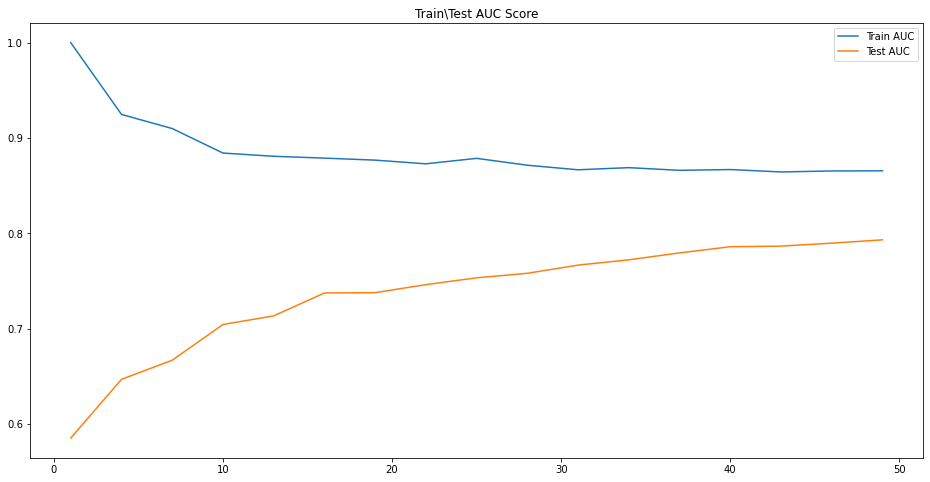

In [63]:
plt.figure(figsize=(16,8))
plt.title("Train\Test AUC Score")
plt.plot(k,auc_score_train,label = "Train AUC")
plt.plot(k ,auc_score_test ,label= "Test AUC")
plt.legend()
plt.show()

In [64]:
# best value of k is 47
k = 47

# plot auc roc curve (FPR-TPR curve)
from sklearn.metrics import roc_curve, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(final_X_train[:1000],y_train[:1000])

y_pred_train = knn.predict_proba(final_X_train[:1000])[:,1]
y_pred_test = knn.predict_proba(final_X_test[:1000])[:,1]

fpr_train , tpr_train , thresholds_train = roc_curve(y_train[:1000],y_pred_train)
fpr_test , tpr_test , thresholds_test  = roc_curve(y_test[:1000],y_pred_test)


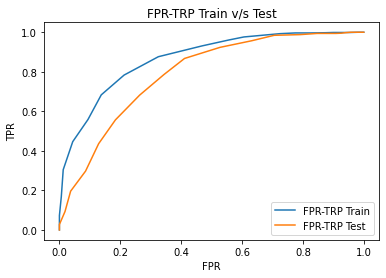

In [66]:
plt.plot(fpr_train,tpr_train,label = "FPR-TRP Train")
plt.plot(fpr_test,tpr_test,label = "FPR-TRP Test")
plt.title("FPR-TRP Train v/s Test")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

## Confusion matrix

 knn.predict = it tell the classes , wether the class is 1 or 0
knn.predictproba = tell us the probability of the class

In [70]:
# best value of k is 47
k = 47

# plot auc roc curve (FPR-TPR curve)
from sklearn.metrics import roc_curve, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(final_X_train[:1000],y_train[:1000])

y_pred_train = knn.predict(final_X_train[:1000])
y_pred_test = knn.predict(final_X_test[:1000])



In [71]:
import seaborn as sns

In [72]:
labels = ["neg","pos"]
conf_mat_train = confusion_matrix(y_train[:1000],y_pred_train) 

In [73]:
conf_mat_train

array([[  0, 160],
       [  0, 840]], dtype=int64)

In [74]:
df = pd.DataFrame(conf_mat_train,index=labels,columns = labels)

In [75]:
print(df)

     neg  pos
neg    0  160
pos    0  840


<AxesSubplot:>

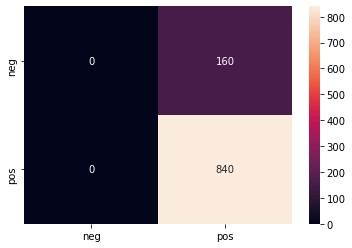

In [77]:
sns.heatmap(df,annot=True,fmt="d")